In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [115]:
df = pd.read_csv('./data/min_temp.csv')
df.head(15)

,Date,Daily_min
0,1/1/81,20.7
1,2/1/81,17.9
2,3/1/81,18.8
3,4/1/81,14.6
4,5/1/81,15.8
5,6/1/81,15.8
6,7/1/81,15.8
7,8/1/81,17.4
8,9/1/81,21.8
9,10/1/81,20.0


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3650 non-null   object 
 1   Daily_min  3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [117]:
df['Date'] = pd.to_datetime(df["Date"],format='%d/%m/%y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3650 non-null   datetime64[ns]
 1   Daily_min  3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [118]:
df.set_index("Date",inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Daily_min  3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


In [119]:
df.head()

,Daily_min
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


<Axes: xlabel='Date'>

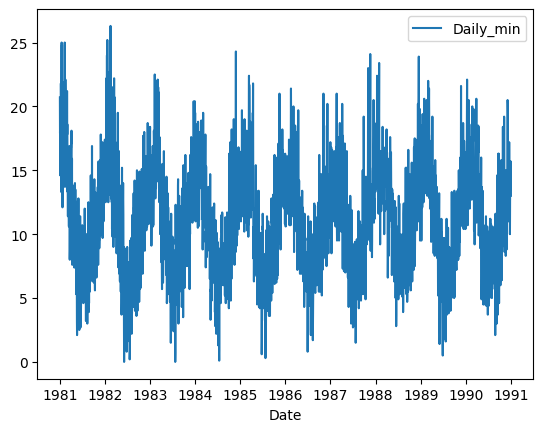

In [120]:
sns.lineplot(df)

<Axes: xlabel='Date'>

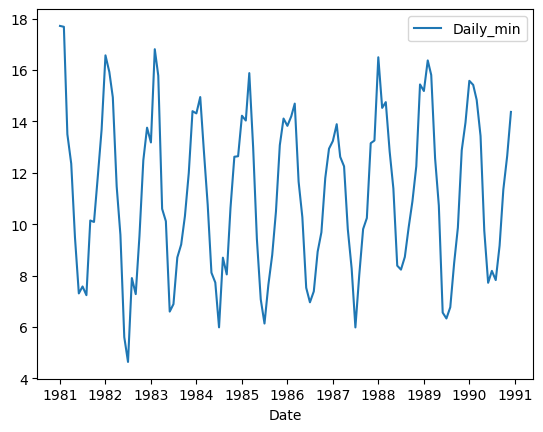

In [121]:
monthly_data = df.resample("MS")
mean = monthly_data.mean()
sns.lineplot(mean)

In [122]:
upsample_df = df.resample('12h').asfreq()
upsample_df.head(15)

,Daily_min
Date,
1981-01-01 00:00:00,20.7
1981-01-01 12:00:00,NaN
1981-01-02 00:00:00,17.9
1981-01-02 12:00:00,NaN
1981-01-03 00:00:00,18.8
1981-01-03 12:00:00,NaN
1981-01-04 00:00:00,14.6
1981-01-04 12:00:00,NaN
1981-01-05 00:00:00,15.8


In [123]:
upsample_df = upsample_df.bfill()
upsample_df.head(15)

,Daily_min
Date,
1981-01-01 00:00:00,20.7
1981-01-01 12:00:00,17.9
1981-01-02 00:00:00,17.9
1981-01-02 12:00:00,18.8
1981-01-03 00:00:00,18.8
1981-01-03 12:00:00,14.6
1981-01-04 00:00:00,14.6
1981-01-04 12:00:00,15.8
1981-01-05 00:00:00,15.8


In [124]:
df_1981 = df['1981-01-04':'1981-01-08']
df_1981.tail()

,Daily_min
Date,
1981-01-04,14.6
1981-01-05,15.8
1981-01-06,15.8
1981-01-07,15.8
1981-01-08,17.4


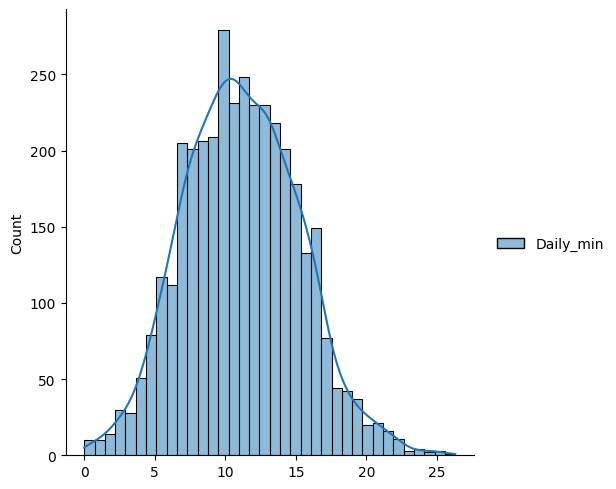

In [125]:
sns.displot(df,kde=True)

## Check for Trends

In [126]:
rolling_mean = df.rolling(window=7,center=False).mean()

<Axes: xlabel='Date', ylabel='Daily_min'>

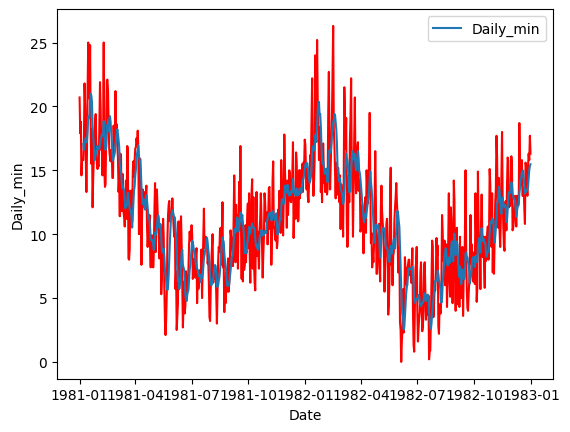

In [127]:
sns.lineplot(df['1981':'1982'],x="Date",y="Daily_min",color='red')
sns.lineplot(rolling_mean['1981':'1982'])

In [128]:
from statsmodels.tsa.stattools import adfuller

output = adfuller(df)
output

(-4.444804924611697,
 0.00024708263003610177,
 20,
 3629,
 {'1%': -3.4321532327220154,
  '5%': -2.862336767636517,
  '10%': -2.56719413172842},
 16642.822304301197)

In [129]:
# get addfuller reports
def ad_fuller_report(output):
    adf_result = pd.Series(output[0:4], index=['ADF Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
    adf_result

    for key, value in output[4].items():
        adf_result[f'Critical Value ({key})'] = value

    print(adf_result)

In [130]:
ad_fuller_report(output)

ADF Statistic                    -4.444805
p-value                           0.000247
Lags Used                        20.000000
Number of Observations Used    3629.000000
Critical Value (1%)              -3.432153
Critical Value (5%)              -2.862337
Critical Value (10%)             -2.567194
dtype: float64


In [131]:
years = pd.date_range('2012-01', periods=72, freq='M')
index = pd.DatetimeIndex(years)

np.random.seed(3456)
sales= np.random.randint(-4, high=4, size=72)
bigger = np.array([0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,3,3,3,3,
                   3,3,3,3,3,3,3,3,7,7,7,7,7,7,7,7,7,7,7,
                   11,11,11,11,11,11,11,11,11,11,18,18,18,
                   18,18,18,18,18,18,26,26,26,26,26,36,36,36,36,36])
final_series = sales+bigger+10
df_gen = pd.Series(final_series, index=index)

In [132]:
df_gen.head()

2012-01-31     9
2012-02-29     8
2012-03-31     8
2012-04-30    10
2012-05-31     6
Freq: M, dtype: int64

<Axes: >

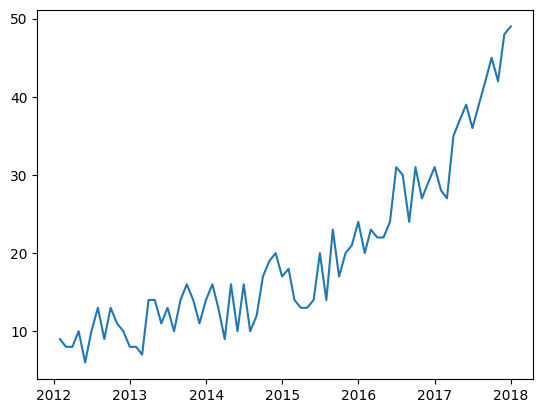

In [133]:
sns.lineplot(df_gen)

In [134]:
ad_output = adfuller(df_gen)

ad_fuller_report(ad_output)

ADF Statistic                   3.761376
p-value                         1.000000
Lags Used                       8.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64


In [135]:
log_df_gen = pd.DataFrame(np.log(df_gen))
log_df_gen.head()

,0
2012-01-31,2.197225
2012-02-29,2.079442
2012-03-31,2.079442
2012-04-30,2.302585
2012-05-31,1.791759


In [136]:
ad_fuller_report(adfuller(log_df_gen))1

ADF Statistic                   1.508781
p-value                         0.997556
Lags Used                       8.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64


In [137]:
diff_df_gen = df_gen.diff(periods=1)

diff_df_gen.isna().sum()


1

In [138]:
diff_df_gen.dropna(inplace=True)

In [139]:
ad_fuller_report(adfuller(diff_df_gen))

ADF Statistic                 -6.455930e+00
p-value                        1.483515e-08
Lags Used                      2.000000e+00
Number of Observations Used    6.800000e+01
Critical Value (1%)           -3.530399e+00
Critical Value (5%)           -2.905087e+00
Critical Value (10%)          -2.590001e+00
dtype: float64


## Dicompotision

In [140]:
from statsmodels.tsa.seasonal import seasonal_decompose
deco = seasonal_decompose(df_gen)

In [141]:
trend = deco.trend
seas = deco.seasonal
res = deco.resid

In [142]:
res.isna().sum()

12

In [143]:
res = res.dropna()

In [144]:
res.isna().sum()

0

In [145]:
ad_fuller_report(adfuller(res))

ADF Statistic                 -7.384719e+00
p-value                        8.294675e-11
Lags Used                      0.000000e+00
Number of Observations Used    5.900000e+01
Critical Value (1%)           -3.546395e+00
Critical Value (5%)           -2.911939e+00
Critical Value (10%)          -2.593652e+00
dtype: float64


In [ ]:
trend.dropna(inplace=True)

<Axes: ylabel='trend'>

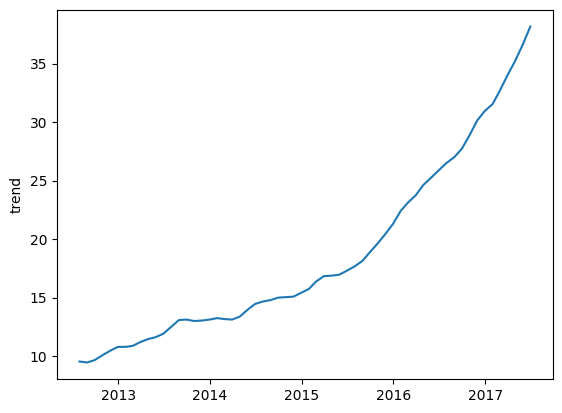

In [146]:
sns.lineplot(trend)

<Axes: ylabel='seasonal'>

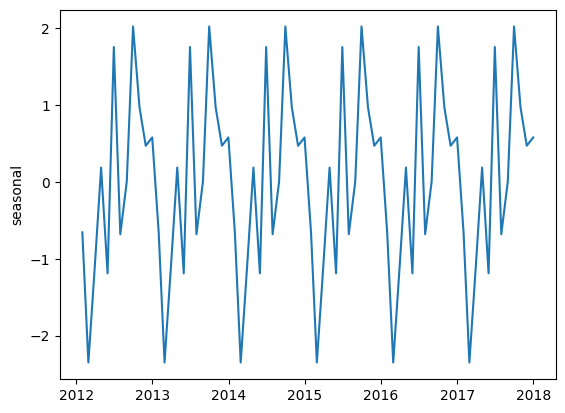

In [147]:
seas.dropna()

sns.lineplot(seas)